# MEng-Team-Project-ML

This notebook contains the initial analysis of SQLite DB files generated \
by our ML system as of February 2022 (refer to git commit for exact \
version).

Each one of our key objectives is far easier to implement than before because\
the StrongSORT algorithm is very performant, and easy to calibrate for our use\
case.
- Object Identification 
  - This objective is the easiest to implement as we have the predicted \
    class along with it's bounding box per frame.
- Object Count
  - For this objective, we just count the number of unique IDs across time. The \
    lower the IDs (identity switching) and higher the AssA (association accuracy) \
    of our model for our dataset, the more reliable this object count will be, and \
    less post-processing of the analytics will be required.
- Object Tracking
  - For each object which is being successfully tracked and ID'd, we track its \
    detected anchor point from its bounding box across time and see which \
    boundaries of the video footage it's intersecting with, to \
    see which routes it's going from and to.

## Load Dataset

### Load COCO Classes

In [1]:
COCO_CLASSES = [ 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
         'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
         'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
         'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
         'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
         'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
         'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
         'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
         'hair drier', 'toothbrush' ]

### Load Pre-Saved Analytical Dataset (SQLite)

In [2]:
import os
from traffic_ml.lib.gdrive import get_gdrive_id, download_file_from_google_drive

TEST_FILE_FNAME = "test.db"
TEST_FILE_LINK  = "https://drive.google.com/file/d/1EEiUSRbU8ehg_UaOJ5x9ci8DTOD-TqrA/view?usp=sharing"

gdrive_id = get_gdrive_id(TEST_FILE_LINK)
out = download_file_from_google_drive(gdrive_id, f"./{TEST_FILE_FNAME}")

if os.path.exists(TEST_FILE_FNAME):
    print("Downloaded successfully!")
else:
    print(f"Error downloading: {TEST_FILE_FNAME}")

Downloaded successfully!


## Data Analysis

### Load Mock Data into Dataframe (Long-Term Analysis-only)

In [293]:
"""
Mock long-term analysis data conditions:
- cols      := (frame, label, det_id, bbox_x, bbox_y, bbox_w, bbox_h)
- fps       := (1)
- timeframe := 60 secs
- busy times:
  - start (0 sec)
    - 10 cars   (going from south to north)
    - 10 bikes  (going from south to north)
    - 10 people (going from south to north)
"""

import pandas as pd

# tm_step => cls_lbl => rows

cols          = ["frame", "label", "det_id", "bbox_x", "bbox_y", "bbox_w", "bbox_h", "REGION_TEST_ONLY"]
entries       = ["car", "bicycle", "person"]
entry_counts  = [10, 10, 10]
tm_step       = [0, 30, 59]
rows          = []

region_pairs  = [
    [
        [
            "South_Burnaby_Road",
            0
        ],
        [   
            "North_Burnaby_Road",
            59
        ]
    ]
]

region_coord = {
    "None":               { "x": 100, "y": 100, "w": 10, "h": 10 },
    "South_Burnaby_Road": { "x": 0,   "y": 0,   "w": 10, "h": 10  },
    "North_Burnaby_Road": { "x": 50,  "y": 50,  "w": 10, "h": 10  },
}

for tm in tm_step:
    for i, (lbl, count) in enumerate(zip(entries, entry_counts)):
        for c in range(count):
            for region_pair in region_pairs:
                start_region_data, end_region_data = region_pair
                start_region_label, start_region_frame = start_region_data[0], start_region_data[1]
                end_region_label, end_region_frame = end_region_data[0], end_region_data[1]

                cur_label = None
                if tm == start_region_frame:
                    cur_label = start_region_label
                elif tm == end_region_frame:
                    cur_label = end_region_label
                else:
                    cur_label = "None"

                cur_region_data = region_coord[cur_label]
                x, y, w, h = cur_region_data["x"], cur_region_data["y"], cur_region_data["w"], cur_region_data["h"]
                det_id = c + i * count
                print("tm, lbl, c, i, count, det_id:", tm, lbl, c, i, count, det_id)
                rows.append([tm, lbl, det_id, x, y, w, h, cur_label])

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

detections_df = pd.DataFrame(data=rows, columns=cols)
display(detections_df)

pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 60)

tm, lbl, c, i, count, det_id: 0 car 0 0 10 0
tm, lbl, c, i, count, det_id: 0 car 1 0 10 1
tm, lbl, c, i, count, det_id: 0 car 2 0 10 2
tm, lbl, c, i, count, det_id: 0 car 3 0 10 3
tm, lbl, c, i, count, det_id: 0 car 4 0 10 4
tm, lbl, c, i, count, det_id: 0 car 5 0 10 5
tm, lbl, c, i, count, det_id: 0 car 6 0 10 6
tm, lbl, c, i, count, det_id: 0 car 7 0 10 7
tm, lbl, c, i, count, det_id: 0 car 8 0 10 8
tm, lbl, c, i, count, det_id: 0 car 9 0 10 9
tm, lbl, c, i, count, det_id: 0 bicycle 0 1 10 10
tm, lbl, c, i, count, det_id: 0 bicycle 1 1 10 11
tm, lbl, c, i, count, det_id: 0 bicycle 2 1 10 12
tm, lbl, c, i, count, det_id: 0 bicycle 3 1 10 13
tm, lbl, c, i, count, det_id: 0 bicycle 4 1 10 14
tm, lbl, c, i, count, det_id: 0 bicycle 5 1 10 15
tm, lbl, c, i, count, det_id: 0 bicycle 6 1 10 16
tm, lbl, c, i, count, det_id: 0 bicycle 7 1 10 17
tm, lbl, c, i, count, det_id: 0 bicycle 8 1 10 18
tm, lbl, c, i, count, det_id: 0 bicycle 9 1 10 19
tm, lbl, c, i, count, det_id: 0 person 0 2 10 20
t

,frame,label,det_id,bbox_x,bbox_y,bbox_w,bbox_h,REGION_TEST_ONLY
0,0,car,0,0,0,10,10,South_Burnaby_Road
1,0,car,1,0,0,10,10,South_Burnaby_Road
2,0,car,2,0,0,10,10,South_Burnaby_Road
3,0,car,3,0,0,10,10,South_Burnaby_Road
4,0,car,4,0,0,10,10,South_Burnaby_Road
5,0,car,5,0,0,10,10,South_Burnaby_Road
6,0,car,6,0,0,10,10,South_Burnaby_Road
7,0,car,7,0,0,10,10,South_Burnaby_Road
8,0,car,8,0,0,10,10,South_Burnaby_Road
9,0,car,9,0,0,10,10,South_Burnaby_Road


### Load Data into Dataframe

In [237]:
import sqlite3
import pandas as pd
groundTruthsData = True

if not groundTruthsData:
    # NOTE: Overwrite this for a local analysis
    # TEST_FILE_FNAME = "night_test.db"
    TEST_FILE_FNAME = "test_sz_640_stride_5_model_yolov8s-pt_tracker_ocsort.db"
    con = sqlite3.connect(TEST_FILE_FNAME)

    # Detected Objects per Frame
    detections_df = pd.read_sql_query("SELECT * FROM detection;", con)

    con.close()
else:
    detections_df = pd.read_csv('test_ground_truth.csv')
    detections_df = detections_df.reindex(columns=['frame', 'label', 'det_id', 'bbox_x', 'bbox_y', 'bbox_w', 'bbox_h'])
    
detections_df


,frame,label,det_id,bbox_x,bbox_y,bbox_w,bbox_h
0,0,car,0.0,1521.0,325.0,213.0,133.0
1,0,bicycle,11.0,907.0,333.0,38.0,33.0
2,0,bus,3.0,1644.0,186.0,230.0,178.0
3,0,car,4.0,756.0,302.0,90.0,54.0
4,0,person,1.0,1066.0,298.0,29.0,80.0
...,...,...,...,...,...,...,...
8980,899,person,16.0,1471.0,278.0,19.0,51.0
8981,899,person,17.0,859.0,300.0,30.0,96.0
8982,899,car,7.0,559.0,281.0,18.0,14.0
8983,899,person,13.0,829.0,305.0,43.0,110.0


### Detection Count (per Frame)

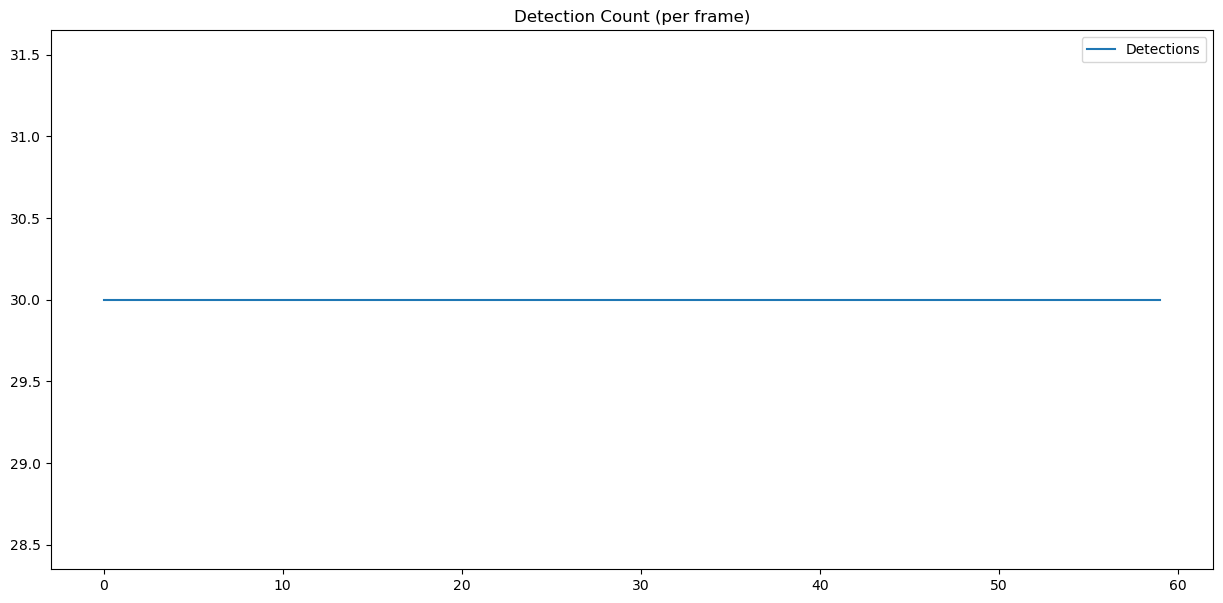

In [294]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,7)

# Use frame or timestamp where they exist
if 'frame' not in detections_df.columns:
    det_count = detections_df["timestamp"]
    det_count = det_count.apply(lambda timestamp: timestamp.float_timestamp)
    print(det_count)
    det_count = det_count.value_counts().sort_index()
else:
    det_count = detections_df['frame'].value_counts().sort_index()

plt.title(f"Detection Count (per frame)")
plt.plot(det_count, label="Detections")

plt.legend()

### Change Frames to Timestamps

In [295]:
import arrow 
# STARTTIME = arrow.get('2023-01-20T152442.922') # Manual Timestamp
STARTTIME = arrow.get('2023-01-20T00:00:00') # Manual Timestamp
STARTTIME.shift(minutes=1)
FPS = 6

def newTimestamp(timestamp, frame, fps):
    return timestamp.shift(microseconds=1000000/fps * frame)

# Change frames to timestamps
detections_df['frame'] = detections_df.apply(
    lambda row: newTimestamp(STARTTIME, int(row["frame"]), FPS), 
    axis=1
)
detections_df = detections_df.rename(columns={'frame':'timestamp'})

In [296]:
detections_df

,timestamp,label,det_id,bbox_x,bbox_y,bbox_w,bbox_h,REGION_TEST_ONLY
0,2023-01-20T00:00:00+00:00,car,0,0,0,10,10,South_Burnaby_Road
1,2023-01-20T00:00:00+00:00,car,1,0,0,10,10,South_Burnaby_Road
2,2023-01-20T00:00:00+00:00,car,2,0,0,10,10,South_Burnaby_Road
3,2023-01-20T00:00:00+00:00,car,3,0,0,10,10,South_Burnaby_Road
4,2023-01-20T00:00:00+00:00,car,4,0,0,10,10,South_Burnaby_Road
...,...,...,...,...,...,...,...,...
85,2023-01-20T00:00:09.833333+00:00,person,25,50,50,10,10,North_Burnaby_Road
86,2023-01-20T00:00:09.833333+00:00,person,26,50,50,10,10,North_Burnaby_Road
87,2023-01-20T00:00:09.833333+00:00,person,27,50,50,10,10,North_Burnaby_Road
88,2023-01-20T00:00:09.833333+00:00,person,28,50,50,10,10,North_Burnaby_Road


### Object Count

In [297]:
data = detections_df

In [298]:
counts = data.groupby('label')['det_id'].nunique().reset_index(name='count')

In [299]:
counts

,label,count
0,bicycle,10
1,car,10
2,person,10


### Object Tracking

In [300]:
routes_df = data[["timestamp", "label", "det_id", "bbox_x", "bbox_y", "bbox_w", "bbox_h"]].copy()
routes_df["anchor_x"] = routes_df.apply(
    lambda row: row["bbox_x"] + (row["bbox_w"] / 2.0), axis=1)
routes_df["anchor_y"] = routes_df.apply(
    lambda row: row["bbox_y"] + (row["bbox_h"] / 2.0), axis=1)

In [301]:
routes_df

,timestamp,label,det_id,bbox_x,bbox_y,bbox_w,bbox_h,anchor_x,anchor_y
0,2023-01-20T00:00:00+00:00,car,0,0,0,10,10,5.0,5.0
1,2023-01-20T00:00:00+00:00,car,1,0,0,10,10,5.0,5.0
2,2023-01-20T00:00:00+00:00,car,2,0,0,10,10,5.0,5.0
3,2023-01-20T00:00:00+00:00,car,3,0,0,10,10,5.0,5.0
4,2023-01-20T00:00:00+00:00,car,4,0,0,10,10,5.0,5.0
...,...,...,...,...,...,...,...,...,...
85,2023-01-20T00:00:09.833333+00:00,person,25,50,50,10,10,55.0,55.0
86,2023-01-20T00:00:09.833333+00:00,person,26,50,50,10,10,55.0,55.0
87,2023-01-20T00:00:09.833333+00:00,person,27,50,50,10,10,55.0,55.0
88,2023-01-20T00:00:09.833333+00:00,person,28,50,50,10,10,55.0,55.0


#### Either First and Last, or all Anchor Points for Each (label, det_id) Tuple

In [302]:
def get_values(group):
    return group[['anchor_x', 'anchor_y']].values.tolist()

entire_routes = routes_df.groupby(['label', 'det_id']).apply(get_values)

In [303]:
entire_routes

label    det_id
bicycle  10        [[5.0, 5.0], [105.0, 105.0], [55.0, 55.0]]
         11        [[5.0, 5.0], [105.0, 105.0], [55.0, 55.0]]
         12        [[5.0, 5.0], [105.0, 105.0], [55.0, 55.0]]
         13        [[5.0, 5.0], [105.0, 105.0], [55.0, 55.0]]
         14        [[5.0, 5.0], [105.0, 105.0], [55.0, 55.0]]
         15        [[5.0, 5.0], [105.0, 105.0], [55.0, 55.0]]
         16        [[5.0, 5.0], [105.0, 105.0], [55.0, 55.0]]
         17        [[5.0, 5.0], [105.0, 105.0], [55.0, 55.0]]
         18        [[5.0, 5.0], [105.0, 105.0], [55.0, 55.0]]
         19        [[5.0, 5.0], [105.0, 105.0], [55.0, 55.0]]
car      0         [[5.0, 5.0], [105.0, 105.0], [55.0, 55.0]]
         1         [[5.0, 5.0], [105.0, 105.0], [55.0, 55.0]]
         2         [[5.0, 5.0], [105.0, 105.0], [55.0, 55.0]]
         3         [[5.0, 5.0], [105.0, 105.0], [55.0, 55.0]]
         4         [[5.0, 5.0], [105.0, 105.0], [55.0, 55.0]]
         5         [[5.0, 5.0], [105.0, 105.0], [55.0,

In [304]:
import json
trk_fmt = "first_last"

def get_values(group, trk_fmt):
    vals = group[['timestamp', 'anchor_x', 'anchor_y']].values.tolist()
    if trk_fmt == "first_last":
        vals = [vals[0], vals[-1]]
    vals = [{"timestamp": val[0], "x": val[1], "y": val[2]} for val in vals]
    return vals

routes = routes_df.groupby(['label', 'det_id']).apply(
            lambda group: get_values(group, trk_fmt))

# Reset the index of the resulting series to remove the MultiIndex
routes = routes.reset_index()

# Replace the MultiIndex label column names with 'label' and 'det_id'
routes.rename(columns={0: 'routes'}, inplace=True)
routes.rename(columns={'level_0': 'label', 'level_1': 'det_id'}, inplace=True)

# Create a dictionary with 'label' as the key and 'routes' as the value
route_endpoints = routes.groupby('label')['routes'].apply(list)

# Separate raw data and analytical data
final_data = {
    "counts": json.loads(counts.to_json(orient="records")),
    "routes": route_endpoints
}

In [305]:
route_endpoints

label
bicycle    [[{'timestamp': 2023-01-20T00:00:00+00:00, 'x'...
car        [[{'timestamp': 2023-01-20T00:00:00+00:00, 'x'...
person     [[{'timestamp': 2023-01-20T00:00:00+00:00, 'x'...
Name: routes, dtype: object

### Object Routes

#### Route Region (Region Visualisation)

Following route regions for Park Rd East, Burnaby Rd South and Park Rd West, respectively (relative to junction)
<div>
<img src="route_regions.png" width="500"/>
</div>

#### Route Region (Polygon Data)

In [306]:
ROUTE_REGIONS = {}

for region_coord_c in region_coord.keys():
    cur_region_coord = region_coord[region_coord_c]
    x, y, w, h = cur_region_coord["x"], cur_region_coord["y"], cur_region_coord["w"], cur_region_coord["h"]
    lst_of_coords = [
        [x-w, y-h],
        [x+w, y-h],
        [x+w, y+h],
        [x-w, y+h],
        [x-w, y-h]
    ]
    ROUTE_REGIONS[region_coord_c] = lst_of_coords

In [307]:
ROUTE_REGIONS

{'None': [[90, 90], [110, 90], [110, 110], [90, 110], [90, 90]],
 'South_Burnaby_Road': [[-10, -10],
  [10, -10],
  [10, 10],
  [-10, 10],
  [-10, -10]],
 'North_Burnaby_Road': [[40, 40], [60, 40], [60, 60], [40, 60], [40, 40]]}

In [308]:
  
# # Original Regions (working with GT)
# ROUTE_REGIONS = {
#     "North_Burnaby_Road": [
#         [
#             1074.9999999999611,
#             759.0000000004657
#         ],
#         [
#             1395.9999999999611,
#             1060.0000000006207
#         ],
#         [
#             1903.999999999573,
#             1067
#         ],
#         [
#             1903.999999999573,
#             584
#         ],
#         [
#             1515.9999999998836,
#             495.00000000046566
#         ],
#         [
#             1074.9999999999611,
#             759.0000000004657
#         ]
#     ],
#     "East_Park_Road": [
#         [
#             732.9999999999611,
#             456.00000000062084
#         ],
#         [
#             492.9999999998836,
#             314
#         ],
#         [
#             490.99999999972835,
#             7.000000000931323
#         ],
#         [
#             0.9999999999611948,
#             3.0000000003104406
#         ],
#         [
#             0.9999999999611948,
#             1075.9999999996894
#         ],
#         [
#             1378.9999999997283,
#             1067
#         ],
#         [
#             732.9999999999611,
#             456.00000000062084
#         ]
#     ],
#     "South_Burnaby_Road": [
#         [
#             1107.9999999998058,
#             376.00000000124174
#         ],
#         [
#             1120.9999999996508,
#             1.0000000012417634
#         ],
#         [
#             501.9999999998836,
#             7.000000000931323
#         ],
#         [
#             504.9999999998836,
#             309.0000000003104
#         ],
#         [
#             748.9999999996508,
#             450.00000000062084
#         ],
#         [
#             1107.9999999998058,
#             376.00000000124174
#         ]
#     ],
#     "West_Park_Road": [
#         [
#             1127.9999999998058,
#             391.0000000009313
#         ],
#         [
#             1911.9999999998058,
#             575
#         ],
#         [
#             1907.9999999998836,
#             165.00000000046566
#         ],
#         [
#             1864.9999999997672,
#             11
#         ],
#         [
#             1137.9999999998836,
#             7.000000000931323
#         ],
#         [
#             1127.9999999998058,
#             391.0000000009313
#         ]
#     ]
# 


### Object Tracking (Start and Finish Regions)

Total number of (start, end) tuples := n * (n - 1), where n is the number of unique route regions. \
For example in the image above, there are 3 route regions (Park W, Park E, Burnaby S). \
So the total number of unique paths for an object is 3 * (3 - 1) => 3 * 2 => 6.

In [309]:
from shapely.geometry import Point, Polygon

# 1. Get start and end pos for each unique object during entire video
start_end_df = entire_routes.copy()
start_end_df = start_end_df.reset_index()

overlap_start_df = start_end_df.copy()[["label", "det_id"]]
overlap_end_df = start_end_df.copy()[["label", "det_id"]]

start_end_df["start_x"] = start_end_df.apply(lambda row: row[0][0][0],  axis=1)
start_end_df["start_y"] = start_end_df.apply(lambda row: row[0][0][1],  axis=1)
start_end_df["end_x"]   = start_end_df.apply(lambda row: row[0][-1][0], axis=1)
start_end_df["end_y"]   = start_end_df.apply(lambda row: row[0][-1][1], axis=1)
if 0 in start_end_df:
    del start_end_df[0]

region_polys = {}

# 2. Get overlaps between start and end, and each region
for route_region in ROUTE_REGIONS.keys():
    cur_polygon = Polygon(ROUTE_REGIONS[route_region])
    region_polys[route_region] = cur_polygon

    # Start Geometry
    start_geometry = [Point(x, y) for x, y in zip(start_end_df["start_x"], start_end_df["start_y"])]

    # Start Overlap
    start_end_df[f"{route_region}_start_overlap"] = [point.within(cur_polygon) for point in start_geometry]
    overlap_start_df[route_region]                = start_end_df[f"{route_region}_start_overlap"]

    # End Geometry
    end_geometry = [Point(x, y) for x, y in zip(start_end_df["end_x"], start_end_df["end_y"])]

    # End Overlap
    start_end_df[f"{route_region}_end_overlap"] = [point.within(cur_polygon) for point in end_geometry]
    overlap_end_df[route_region]                = start_end_df[f"{route_region}_end_overlap"]

In [310]:
start_end_df

,label,det_id,start_x,start_y,end_x,end_y,None_start_overlap,None_end_overlap,South_Burnaby_Road_start_overlap,South_Burnaby_Road_end_overlap,North_Burnaby_Road_start_overlap,North_Burnaby_Road_end_overlap
0,bicycle,10,5.0,5.0,55.0,55.0,False,False,True,False,False,True
1,bicycle,11,5.0,5.0,55.0,55.0,False,False,True,False,False,True
2,bicycle,12,5.0,5.0,55.0,55.0,False,False,True,False,False,True
3,bicycle,13,5.0,5.0,55.0,55.0,False,False,True,False,False,True
4,bicycle,14,5.0,5.0,55.0,55.0,False,False,True,False,False,True
5,bicycle,15,5.0,5.0,55.0,55.0,False,False,True,False,False,True
6,bicycle,16,5.0,5.0,55.0,55.0,False,False,True,False,False,True
7,bicycle,17,5.0,5.0,55.0,55.0,False,False,True,False,False,True
8,bicycle,18,5.0,5.0,55.0,55.0,False,False,True,False,False,True
9,bicycle,19,5.0,5.0,55.0,55.0,False,False,True,False,False,True


#### Determine (Start, End) Tuples

In [311]:
overlap_start_df.head(20)

,label,det_id,None,South_Burnaby_Road,North_Burnaby_Road
0,bicycle,10,False,True,False
1,bicycle,11,False,True,False
2,bicycle,12,False,True,False
3,bicycle,13,False,True,False
4,bicycle,14,False,True,False
5,bicycle,15,False,True,False
6,bicycle,16,False,True,False
7,bicycle,17,False,True,False
8,bicycle,18,False,True,False
9,bicycle,19,False,True,False


#### Determine Start Label

In [312]:
import numpy as np

def label_overlap(row):
    for i in range(len(row)):
        if row[i]:
            return overlap_start_df.columns[2:][i]
    return np.nan

overlap_start_df['overlap_label'] = overlap_start_df.iloc[:, 2:].apply(label_overlap, axis=1)

In [313]:
overlap_start_df

,label,det_id,None,South_Burnaby_Road,North_Burnaby_Road,overlap_label
0,bicycle,10,False,True,False,South_Burnaby_Road
1,bicycle,11,False,True,False,South_Burnaby_Road
2,bicycle,12,False,True,False,South_Burnaby_Road
3,bicycle,13,False,True,False,South_Burnaby_Road
4,bicycle,14,False,True,False,South_Burnaby_Road
5,bicycle,15,False,True,False,South_Burnaby_Road
6,bicycle,16,False,True,False,South_Burnaby_Road
7,bicycle,17,False,True,False,South_Burnaby_Road
8,bicycle,18,False,True,False,South_Burnaby_Road
9,bicycle,19,False,True,False,South_Burnaby_Road


#### Determine End Label

In [314]:
import numpy as np

def label_overlap(row):
    for i in range(len(row)):
        if row[i]:
            return overlap_end_df.columns[2:][i]
    return np.nan

overlap_end_df['overlap_label'] = overlap_end_df.iloc[:, 2:].apply(label_overlap, axis=1)

In [315]:
overlap_end_df.head(20)

,label,det_id,None,South_Burnaby_Road,North_Burnaby_Road,overlap_label
0,bicycle,10,False,False,True,North_Burnaby_Road
1,bicycle,11,False,False,True,North_Burnaby_Road
2,bicycle,12,False,False,True,North_Burnaby_Road
3,bicycle,13,False,False,True,North_Burnaby_Road
4,bicycle,14,False,False,True,North_Burnaby_Road
5,bicycle,15,False,False,True,North_Burnaby_Road
6,bicycle,16,False,False,True,North_Burnaby_Road
7,bicycle,17,False,False,True,North_Burnaby_Road
8,bicycle,18,False,False,True,North_Burnaby_Road
9,bicycle,19,False,False,True,North_Burnaby_Road


#### Create Final Overlap DataFrame

In [316]:
overlap_df = start_end_df.iloc[:, :2]
overlap_df["start"] = overlap_start_df["overlap_label"]
overlap_df["end"]   = overlap_end_df["overlap_label"]

In [317]:
overlap_df

,label,det_id,start,end
0,bicycle,10,South_Burnaby_Road,North_Burnaby_Road
1,bicycle,11,South_Burnaby_Road,North_Burnaby_Road
2,bicycle,12,South_Burnaby_Road,North_Burnaby_Road
3,bicycle,13,South_Burnaby_Road,North_Burnaby_Road
4,bicycle,14,South_Burnaby_Road,North_Burnaby_Road
5,bicycle,15,South_Burnaby_Road,North_Burnaby_Road
6,bicycle,16,South_Burnaby_Road,North_Burnaby_Road
7,bicycle,17,South_Burnaby_Road,North_Burnaby_Road
8,bicycle,18,South_Burnaby_Road,North_Burnaby_Road
9,bicycle,19,South_Burnaby_Road,North_Burnaby_Road


### Finding Times Spent in and Out of Regions

#### Organise Route Boundary DataFrame

In [318]:
def get_values(group):
    return group[['timestamp','anchor_x', 'anchor_y']].values.tolist()

route_boundaries_df = routes_df.groupby(['label', 'det_id']).apply(get_values)
route_boundaries_df = pd.DataFrame(route_boundaries_df.reset_index(name='route'))
route_boundaries_df

,label,det_id,route
0,bicycle,10,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-..."
1,bicycle,11,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-..."
2,bicycle,12,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-..."
3,bicycle,13,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-..."
4,bicycle,14,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-..."
5,bicycle,15,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-..."
6,bicycle,16,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-..."
7,bicycle,17,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-..."
8,bicycle,18,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-..."
9,bicycle,19,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-..."


In [319]:
# Add region names from overlap_df
route_boundaries_df = pd.merge(route_boundaries_df, overlap_df, on=['label', 'det_id'])
route_boundaries_df.rename(columns={'start':'start_region', 'end':'end_region'}, inplace=True)
entire_routes = route_boundaries_df.copy()

In [320]:
region_polys

{'None': <POLYGON ((90 90, 110 90, 110 110, 90 110, 90 90))>,
 'South_Burnaby_Road': <POLYGON ((-10 -10, 10 -10, 10 10, -10 10, -10 -10))>,
 'North_Burnaby_Road': <POLYGON ((40 40, 60 40, 60 60, 40 60, 40 40))>}

#### Arrange Start and End Points

In [321]:
route_boundaries_df['start_point'] = route_boundaries_df['route'].apply(lambda route: route[0])
route_boundaries_df['end_point'] = route_boundaries_df['route'].apply(lambda route: route[-1])
route_boundaries_df

,label,det_id,route,start_region,end_region,start_point,end_point
0,bicycle,10,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-...",South_Burnaby_Road,North_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]"
1,bicycle,11,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-...",South_Burnaby_Road,North_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]"
2,bicycle,12,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-...",South_Burnaby_Road,North_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]"
3,bicycle,13,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-...",South_Burnaby_Road,North_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]"
4,bicycle,14,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-...",South_Burnaby_Road,North_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]"
5,bicycle,15,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-...",South_Burnaby_Road,North_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]"
6,bicycle,16,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-...",South_Burnaby_Road,North_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]"
7,bicycle,17,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-...",South_Burnaby_Road,North_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]"
8,bicycle,18,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-...",South_Burnaby_Road,North_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]"
9,bicycle,19,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-...",South_Burnaby_Road,North_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]"


#### Find Starting Region Boundary

In [322]:
def findFirstRegionBoundary(vals):
    initialRegion = which_region(Point(*vals[0][1:]))

    if initialRegion is None: return None
    
    # Binary search for boundary point
    pointRange = vals
    while len(pointRange) > 1:

        midIndex = round(len(pointRange)/2)
        midpoint = pointRange[midIndex]
        regionCheck = which_region(Point(*midpoint[1:]))

        if regionCheck == initialRegion:
            pointRange = pointRange[midIndex:] # go right
        else:
            pointRange = pointRange[:midIndex] # go left
    
    if len(pointRange) != 0: return pointRange[0]

def which_region(point):
    for label, poly in region_polys.items():
        if point.within(poly):
            return label

route_boundaries_df['start_boundary'] = route_boundaries_df['route'].apply(findFirstRegionBoundary)


In [323]:
route_boundaries_df

,label,det_id,route,start_region,end_region,start_point,end_point,start_boundary
0,bicycle,10,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-...",South_Burnaby_Road,North_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]"
1,bicycle,11,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-...",South_Burnaby_Road,North_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]"
2,bicycle,12,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-...",South_Burnaby_Road,North_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]"
3,bicycle,13,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-...",South_Burnaby_Road,North_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]"
4,bicycle,14,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-...",South_Burnaby_Road,North_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]"
5,bicycle,15,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-...",South_Burnaby_Road,North_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]"
6,bicycle,16,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-...",South_Burnaby_Road,North_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]"
7,bicycle,17,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-...",South_Burnaby_Road,North_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]"
8,bicycle,18,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-...",South_Burnaby_Road,North_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]"
9,bicycle,19,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-...",South_Burnaby_Road,North_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]"


#### Find Ending Region Boundary

In [324]:
def findEndRegionBoundary(start_region, end_region, route):
    if start_region == end_region:
        return None
    else:
        return findFirstRegionBoundary(route[::-1])

# Reverse the list and find the end region boundary
route_boundaries_df['end_boundary'] = route_boundaries_df.apply(
    lambda row: findEndRegionBoundary(row['start_region'], row['end_region'], row['route']),
    axis=1
)
route_boundaries_df

,label,det_id,route,start_region,end_region,start_point,end_point,start_boundary,end_boundary
0,bicycle,10,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-...",South_Burnaby_Road,North_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]"
1,bicycle,11,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-...",South_Burnaby_Road,North_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]"
2,bicycle,12,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-...",South_Burnaby_Road,North_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]"
3,bicycle,13,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-...",South_Burnaby_Road,North_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]"
4,bicycle,14,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-...",South_Burnaby_Road,North_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]"
5,bicycle,15,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-...",South_Burnaby_Road,North_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]"
6,bicycle,16,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-...",South_Burnaby_Road,North_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]"
7,bicycle,17,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-...",South_Burnaby_Road,North_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]"
8,bicycle,18,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-...",South_Burnaby_Road,North_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]"
9,bicycle,19,"[[2023-01-20T00:00:00+00:00, 5.0, 5.0], [2023-...",South_Burnaby_Road,North_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]"


#### Organise Dataframe

In [325]:
# Reorder columns
route_boundaries_df = route_boundaries_df.reindex(columns=['label', 'det_id', 'start_region', 'start_point', 'start_boundary', 'end_boundary', 'end_point', 'end_region'])
route_boundaries_df
route_boundaries_df.loc[route_boundaries_df['label'] == 'car']

,label,det_id,start_region,start_point,start_boundary,end_boundary,end_point,end_region
10,car,0,South_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]",North_Burnaby_Road
11,car,1,South_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]",North_Burnaby_Road
12,car,2,South_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]",North_Burnaby_Road
13,car,3,South_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]",North_Burnaby_Road
14,car,4,South_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]",North_Burnaby_Road
15,car,5,South_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]",North_Burnaby_Road
16,car,6,South_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]",North_Burnaby_Road
17,car,7,South_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]",North_Burnaby_Road
18,car,8,South_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]",North_Burnaby_Road
19,car,9,South_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]",North_Burnaby_Road


#### Workout Times Spent in Each Region From Timestamps

In [326]:
route_times_df = route_boundaries_df.copy()

def find_time(start_boundary, end_boundary):
    if start_boundary is None or end_boundary is None: 
        return None
    else:
        return end_boundary[0] - start_boundary[0]

# Time spent overall in the route
route_times_df['overall_time'] = route_times_df.apply(
    lambda row: row['end_point'][0] - row['start_point'][0], 
    axis=1
)
# Time spent in first region
route_times_df['start_region_time'] = route_times_df.apply(
    lambda row: find_time(row['start_point'], row['start_boundary']), 
    axis=1
)
# Time spent in last region
route_times_df['end_region_time'] = route_times_df.apply(
    lambda row: row['start_region_time'] if pd.isna(result := find_time(row['end_boundary'], row['end_point'])) else result,
    axis=1
)
route_times_df

,label,det_id,start_region,start_point,start_boundary,end_boundary,end_point,end_region,overall_time,start_region_time,end_region_time
0,bicycle,10,South_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]",North_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days
1,bicycle,11,South_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]",North_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days
2,bicycle,12,South_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]",North_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days
3,bicycle,13,South_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]",North_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days
4,bicycle,14,South_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]",North_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days
5,bicycle,15,South_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]",North_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days
6,bicycle,16,South_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]",North_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days
7,bicycle,17,South_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]",North_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days
8,bicycle,18,South_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]",North_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days
9,bicycle,19,South_Burnaby_Road,"[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:00+00:00, 5.0, 5.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]","[2023-01-20T00:00:09.833333+00:00, 55.0, 55.0]",North_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days


In [327]:

def out_of_region_time(overall_time, start_region_time, end_region_time):
    startIsNotNone = not pd.isna(start_region_time)
    endIsNotNone = not pd.isna(end_region_time)

    # Ensure if there's only one region the no_region_time is None
    if overall_time == start_region_time: return None

    if startIsNotNone and endIsNotNone and start_region_time != end_region_time:
        return (overall_time - start_region_time) - end_region_time
    elif startIsNotNone:
        return overall_time - start_region_time
    elif endIsNotNone:
        return overall_time - end_region_time
    else:
        return overall_time
    
# Time spent not in a region
route_times_df['no_region_time'] = route_times_df.apply(
    lambda row: out_of_region_time(row['overall_time'], row['start_region_time'], row['end_region_time']), 
    axis=1
)

# Reorder columns
route_times_df = route_times_df.reindex(columns=['label', 'det_id', 'start_region', 'overall_time', 'start_region_time', 'end_region_time', 'no_region_time', 'end_region'])
route_times_df.head(30)

,label,det_id,start_region,overall_time,start_region_time,end_region_time,no_region_time,end_region
0,bicycle,10,South_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days,0 days 00:00:09.833333,North_Burnaby_Road
1,bicycle,11,South_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days,0 days 00:00:09.833333,North_Burnaby_Road
2,bicycle,12,South_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days,0 days 00:00:09.833333,North_Burnaby_Road
3,bicycle,13,South_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days,0 days 00:00:09.833333,North_Burnaby_Road
4,bicycle,14,South_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days,0 days 00:00:09.833333,North_Burnaby_Road
5,bicycle,15,South_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days,0 days 00:00:09.833333,North_Burnaby_Road
6,bicycle,16,South_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days,0 days 00:00:09.833333,North_Burnaby_Road
7,bicycle,17,South_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days,0 days 00:00:09.833333,North_Burnaby_Road
8,bicycle,18,South_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days,0 days 00:00:09.833333,North_Burnaby_Road
9,bicycle,19,South_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days,0 days 00:00:09.833333,North_Burnaby_Road


In [328]:
route_times_df.to_csv("PredictionTruthRoutesSmallCorrected.csv")

In [329]:
route_times_df.loc[route_times_df['label'] == 'bike']


,label,det_id,start_region,overall_time,start_region_time,end_region_time,no_region_time,end_region


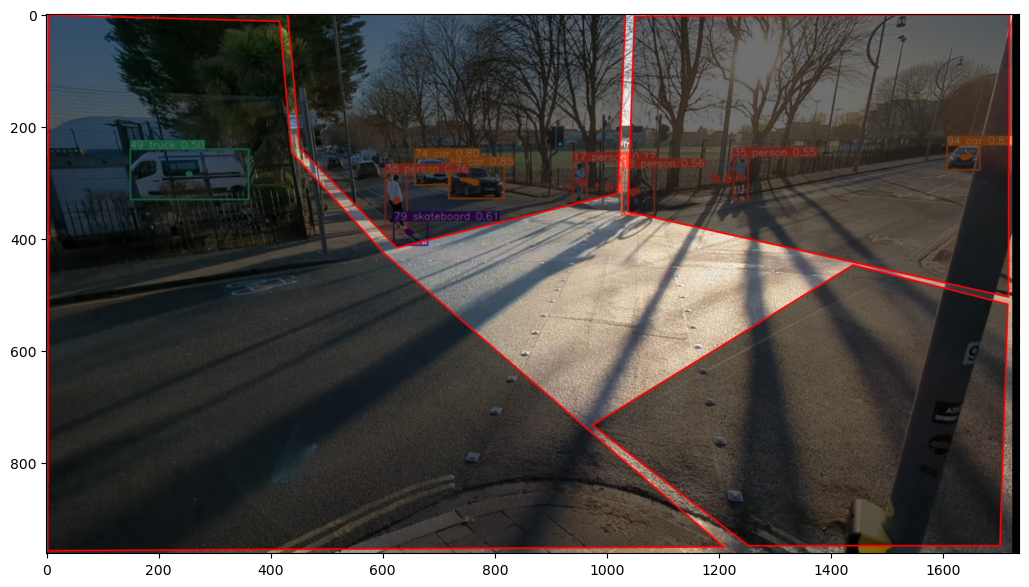

In [330]:
# test_route = entire_routes.loc[entire_routes['det_id'] == 55]['route'].to_list()
# for point in test_route[0]:
#     print(point[0] - STARTTIME, '\t\t', point[1:], '\t\t', which_region(Point(*point[1:])))

    
no_region_points = []
for route in entire_routes['route']:
    for point in route:
        region = which_region(Point(*point[1:]))
        if region is None:
            no_region_points.append(point[1:])
no_region_points

import matplotlib.pyplot as plt
im = plt.imread('route_regions.png')
implot = plt.imshow(im)

# put a blue dot at (10, 20)
for point in no_region_points:
    plt.scatter([point[0]], [point[1]], c='g')

plt.show()

## Apply Filtering Structure

## Add start and end detection timestamps


In [331]:
## Add start and end times of detection for time filtering
route_times_df['start_time'] = route_boundaries_df['start_point'].apply(
    lambda row: row[0],
)
route_times_df['end_time'] = route_boundaries_df['end_point'].apply(
    lambda row: row[0],
)
route_times_df.head()

,label,det_id,start_region,overall_time,start_region_time,end_region_time,no_region_time,end_region,start_time,end_time
0,bicycle,10,South_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days,0 days 00:00:09.833333,North_Burnaby_Road,2023-01-20T00:00:00+00:00,2023-01-20T00:00:09.833333+00:00
1,bicycle,11,South_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days,0 days 00:00:09.833333,North_Burnaby_Road,2023-01-20T00:00:00+00:00,2023-01-20T00:00:09.833333+00:00
2,bicycle,12,South_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days,0 days 00:00:09.833333,North_Burnaby_Road,2023-01-20T00:00:00+00:00,2023-01-20T00:00:09.833333+00:00
3,bicycle,13,South_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days,0 days 00:00:09.833333,North_Burnaby_Road,2023-01-20T00:00:00+00:00,2023-01-20T00:00:09.833333+00:00
4,bicycle,14,South_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days,0 days 00:00:09.833333,North_Burnaby_Road,2023-01-20T00:00:00+00:00,2023-01-20T00:00:09.833333+00:00


## Analysis Data formatting

In [332]:
# Main Request Variables
CLASSES = ['person', 'car', 'truck', 'bicycle']
START_REGIONS = ROUTE_REGIONS
# del START_REGIONS['West_Park_Road']
END_REGIONS = ROUTE_REGIONS

In [333]:
### Sort DataFrame
route_times_df.sort_values(['start_time', 'end_time'], axis=0, inplace=True)
route_times_df.head()

,label,det_id,start_region,overall_time,start_region_time,end_region_time,no_region_time,end_region,start_time,end_time
0,bicycle,10,South_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days,0 days 00:00:09.833333,North_Burnaby_Road,2023-01-20T00:00:00+00:00,2023-01-20T00:00:09.833333+00:00
1,bicycle,11,South_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days,0 days 00:00:09.833333,North_Burnaby_Road,2023-01-20T00:00:00+00:00,2023-01-20T00:00:09.833333+00:00
2,bicycle,12,South_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days,0 days 00:00:09.833333,North_Burnaby_Road,2023-01-20T00:00:00+00:00,2023-01-20T00:00:09.833333+00:00
3,bicycle,13,South_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days,0 days 00:00:09.833333,North_Burnaby_Road,2023-01-20T00:00:00+00:00,2023-01-20T00:00:09.833333+00:00
4,bicycle,14,South_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days,0 days 00:00:09.833333,North_Burnaby_Road,2023-01-20T00:00:00+00:00,2023-01-20T00:00:09.833333+00:00


In [334]:
### Data filtering
route_times_df = route_times_df[route_times_df['label'].isin(CLASSES)]
route_times_df.head()

,label,det_id,start_region,overall_time,start_region_time,end_region_time,no_region_time,end_region,start_time,end_time
0,bicycle,10,South_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days,0 days 00:00:09.833333,North_Burnaby_Road,2023-01-20T00:00:00+00:00,2023-01-20T00:00:09.833333+00:00
1,bicycle,11,South_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days,0 days 00:00:09.833333,North_Burnaby_Road,2023-01-20T00:00:00+00:00,2023-01-20T00:00:09.833333+00:00
2,bicycle,12,South_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days,0 days 00:00:09.833333,North_Burnaby_Road,2023-01-20T00:00:00+00:00,2023-01-20T00:00:09.833333+00:00
3,bicycle,13,South_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days,0 days 00:00:09.833333,North_Burnaby_Road,2023-01-20T00:00:00+00:00,2023-01-20T00:00:09.833333+00:00
4,bicycle,14,South_Burnaby_Road,0 days 00:00:09.833333,0 days,0 days,0 days 00:00:09.833333,North_Burnaby_Road,2023-01-20T00:00:00+00:00,2023-01-20T00:00:09.833333+00:00


In [335]:
### Splitting the detections by timestamp intervals
ENDTIME = route_times_df['end_time'].iloc[-1]
intervalSpacing = 30
timeBoundaries = [i for i in arrow.Arrow.interval('minute', STARTTIME, ENDTIME, intervalSpacing)]
BoundaryEnds = [i[1] for i in timeBoundaries]

print(f"dets: {len(route_times_df)}")

detSplit = [[] for i in range(len(BoundaryEnds))]
currentDet = 0
for boundaryIndex, timeBoundary in enumerate(BoundaryEnds):
    nextBound = False

    for detIndex, det in route_times_df.iloc[currentDet:].iterrows():
        start, end = det['start_time'], det['end_time']

        if start < timeBoundary:
            # if end within time interval or at least has more time in interval
            if end < timeBoundary or timeBoundary - start > end - timeBoundary:
                destInterval = boundaryIndex # Add detection to current interval
            else:
                destInterval = boundaryIndex + 1 # Add detection to next interval
            detSplit[destInterval].append(det)
        else:
            nextBound = True
            break

        currentDet += 1

    if nextBound:
        continue

s = 0
for i in detSplit:
    s += len(i)
print(f"sum: {s}")

print()

dets: 30
sum: 30



In [336]:
### Split Detections into data-structure with interval stamps

# Separate Detections (dets) by period of time
countsAtTimes = [{'periodFrom'  : from_.float_timestamp, 
            'periodTo'    : to_.float_timestamp,
            'routeCounts' : pd.DataFrame(dets, columns=route_times_df.columns)} \
            for (from_, to_), dets in zip(timeBoundaries, detSplit)]
countsAtTimes[0]['routeCounts']

# Count detection types
def countByClass(df):
    counts = {'total':0}
    for _, row in df.iterrows():
        label = row['label']
        if label in counts:
            counts[label] += 1
        else:
            counts[label] = 1
        counts['total'] += 1
    return counts

# Separate Further into Directional Combinations of Start region and End region for each interval
for interval in countsAtTimes:
    routeCounts = interval['routeCounts']
    # Filter detections by their Start and End regions
    routeCounts = routeCounts[
        (routeCounts['start_region'].isin(START_REGIONS)) &
        (routeCounts['end_region'].isin(END_REGIONS))]

    # Split detections by start end region combinations
    detSplit = {}
    for _, det in routeCounts.iterrows():
        start, end = det['start_region'], det['end_region']
        if start == end:
            continue # filter out stationary detections
        elif (start, end) not in detSplit:
            detSplit[(start, end)] = [det]
        else:
            detSplit[(start, end)].append(det)

    routeCounts = []
    # Structure the split detections
    for key, value in detSplit.items():
        df = pd.DataFrame(value, columns=route_times_df.columns)
        routeCounts.append({
            'start': key[0], 
            'end': key[1], 
            'counts': countByClass(df)
        })

    interval['routeCounts'] = routeCounts

    # Structure the rest of the json message
    dataToSend = {
    "dataSource": "filename",
    "regions": list(ROUTE_REGIONS.keys()),
    "countsAtTimes": countsAtTimes
    }

    import json
    dataToSend = json.dumps(dataToSend, indent=4)
    print(dataToSend)

{
    "dataSource": "filename",
    "regions": [
        "None",
        "South_Burnaby_Road",
        "North_Burnaby_Road"
    ],
    "countsAtTimes": [
        {
            "periodFrom": 1674172800.0,
            "periodTo": 1674172859.999999,
            "routeCounts": [
                {
                    "start": "South_Burnaby_Road",
                    "end": "North_Burnaby_Road",
                    "counts": {
                        "total": 30,
                        "bicycle": 10,
                        "car": 10,
                        "person": 10
                    }
                }
            ]
        }
    ]
}
